Read excel file containing features extracted by ResNet50

In [53]:
#save into dataframe
import pandas as pd

df = pd.read_excel("ftResnet50.xlsx")

In [ ]:
df.head()

In [54]:
#train_test_split method of scikit learn library
from sklearn.model_selection import train_test_split

#remove unnecessary column
x_in = df.drop(['Unnamed: 0','Image_name', 'Xray_class'], axis=1)
y_out = df.Xray_class
xtrain, xtest, ytrain, ytest = train_test_split(x_in, y_out, test_size=0.2, shuffle=True, stratify=y_out)

KNN without CV

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [56]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [57]:
pred_knn = knn.predict(xtest)

In [58]:
print(accuracy_score(ytest, pred_knn))

0.8833333333333333


Confusion matrix KNN without CV

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix of ResNet50 + KNN classifier without CV')

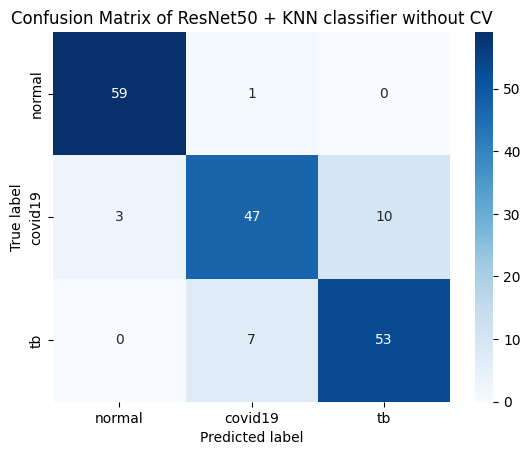

In [60]:
cm = confusion_matrix(ytest, pred_knn)
classes=['normal', 'covid19', 'tb']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of ResNet50 + KNN classifier without CV')

In [61]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.85      0.78      0.82        60
           2       0.84      0.88      0.86        60

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



ROC KNN without CV

In [62]:
#plot roc multiclass
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from keras.utils import to_categorical

In [63]:
# Binarize the output
PRED = to_categorical(pred_knn, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

In [64]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\Zul\AppData\Local\Temp\ipykernel_11664\1970365518.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


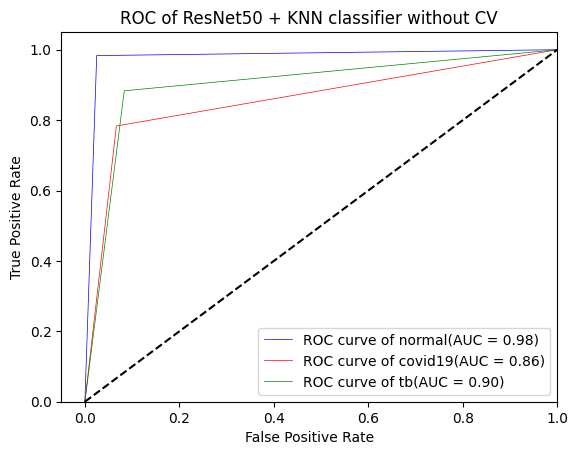

In [65]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'covid19', 2:'tb'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of ResNet50 + KNN classifier without CV')
plt.legend(loc="lower right")
plt.show()

KNN with CV

In [66]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [67]:
x_ar = x_in.to_numpy()
y_ar = y_out.to_numpy()

In [68]:
# 10 fold cv

kf10_knn = KFold(n_splits = 10, shuffle=True)

scores2_knn = cross_val_score(knn, x_ar, y_ar, cv = kf10_knn)

print("Cross Validation Scores: ", scores2_knn)
print("Average CV Score: ", scores2_knn.mean())
print("Number of CV Scores used in Average: ", len(scores2_knn))

Cross Validation Scores:  [0.92222222 0.96666667 0.88888889 0.92222222 0.95555556 0.94444444
 0.87777778 0.94444444 0.92222222 0.9       ]
Average CV Score:  0.9244444444444445
Number of CV Scores used in Average:  10


In [69]:
# Make cross validated predictions
predictions = cross_val_predict(knn, x_ar, y_ar, cv=kf10_knn)

In [70]:
# Binarize the output
PREDcv = to_categorical(predictions, num_classes=3)

Ycv = to_categorical(y_ar, num_classes=3)

ROC KNN with CV

In [71]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Ycv[:,i], PREDcv[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\Zul\AppData\Local\Temp\ipykernel_11664\3991565977.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


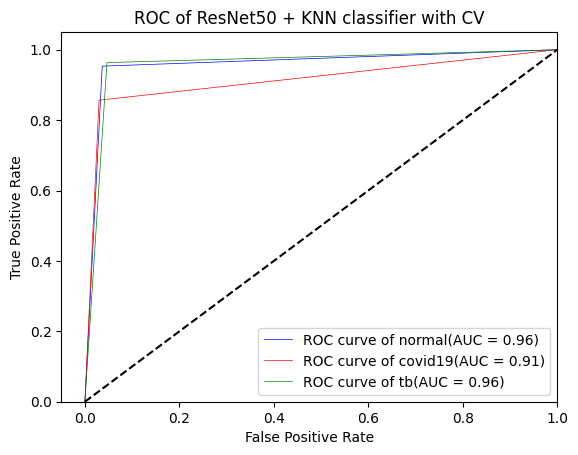

In [72]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'covid19', 2:'tb'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of ResNet50 + KNN classifier with CV')
plt.legend(loc="lower right")
plt.show()

Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 4, random_state = 0)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=4, random_state=0)

In [74]:
preds_rf=rfc.predict(xtest)

In [75]:
print(accuracy_score(ytest, preds_rf))

0.8833333333333333


Confusion Matrix RF without CV

Text(0.5, 1.0, 'Confusion Matrix of ResNet50 + RF classifier without CV')

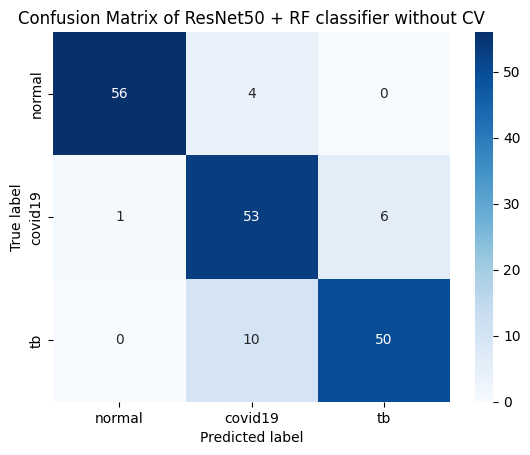

In [76]:
cm = confusion_matrix(ytest, preds_rf)
classes=['normal', 'covid19', 'tb']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of ResNet50 + RF classifier without CV')

Classification report RF

In [77]:
from sklearn.metrics import classification_report
print(classification_report(ytest, preds_rf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.79      0.88      0.83        60
           2       0.89      0.83      0.86        60

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



In [78]:
# Binarize the output
PRED = to_categorical(preds_rf, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

ROC RF without CV

In [79]:
#False positive rate and True positive rate for AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC + AUC (RF)

C:\Users\Zul\AppData\Local\Temp\ipykernel_11664\762876785.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


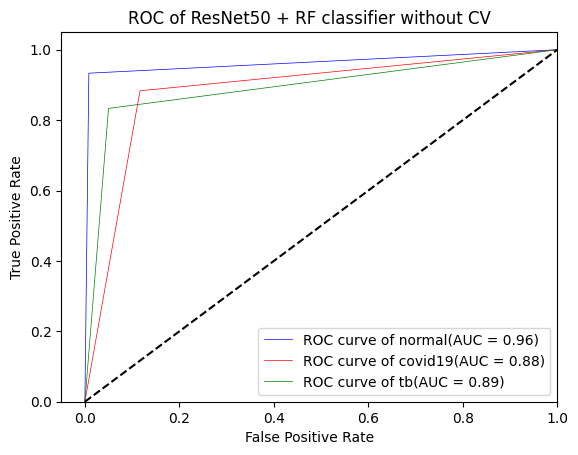

In [80]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'covid19', 2:'tb'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of ResNet50 + RF classifier without CV')
plt.legend(loc="lower right")
plt.show()

RF with CV

In [81]:
# 10 fold cv

kf10_RF = KFold(n_splits = 10, shuffle=True)

scores2_RF = cross_val_score(rfc, x_ar, y_ar, cv = kf10_RF)

print("Cross Validation Scores: ", scores2_RF)
print("Average CV Score: ", scores2_RF.mean())
print("Number of CV Scores used in Average: ", len(scores2_RF))

Cross Validation Scores:  [0.9        0.88888889 0.93333333 0.95555556 0.86666667 0.91111111
 0.92222222 0.88888889 0.93333333 0.91111111]
Average CV Score:  0.9111111111111111
Number of CV Scores used in Average:  10


In [82]:
# Make cross validated predictions
predictions = cross_val_predict(rfc, x_ar, y_ar, cv=kf10_RF)

In [83]:
# Binarize the output
PREDcv = to_categorical(predictions, num_classes=3)

Ycv = to_categorical(y_ar, num_classes=3)

ROC RF with CV

In [84]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Ycv[:,i], PREDcv[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\Zul\AppData\Local\Temp\ipykernel_11664\678958070.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


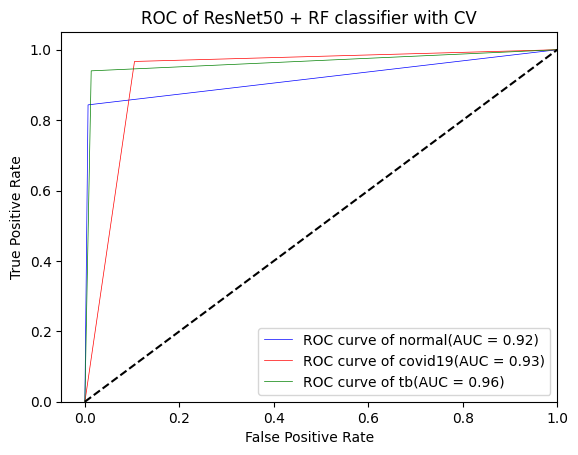

In [85]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'covid19', 2:'tb'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of ResNet50 + RF classifier with CV')
plt.legend(loc="lower right")
plt.show()

ANN

In [86]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs',alpha=1e-5, random_state=0)
ann.fit(xtrain, ytrain)

MLPClassifier(alpha=1e-05, random_state=0, solver='lbfgs')

In [87]:
preds_ann=ann.predict(xtest)

In [88]:
print(accuracy_score(ytest, preds_ann))

0.9388888888888889


Confusion matrix ANN

Text(0.5, 1.0, 'Confusion Matrix of ResNet50 + ANN classifier without CV')

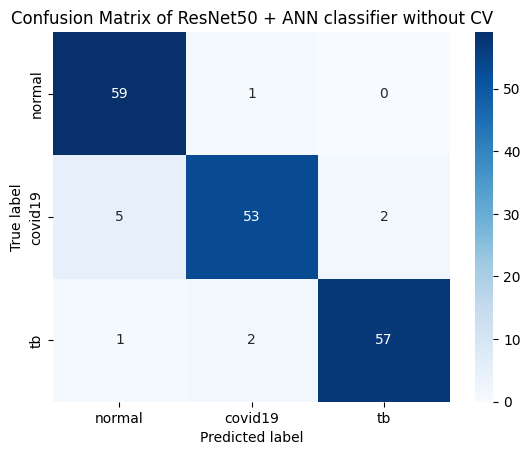

In [90]:
cm = confusion_matrix(ytest, preds_ann)
classes=['normal', 'covid19', 'tb']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of ResNet50 + ANN classifier without CV')

In [91]:
print(classification_report(ytest, preds_ann))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.95      0.88      0.91        60
           2       0.97      0.95      0.96        60

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



In [92]:
# Binarize the output
PRED = to_categorical(preds_ann, num_classes=3)
y = label_binarize(y_out, classes=[0,1,2])
n_classes = y.shape[1]

Y_test = to_categorical(ytest, num_classes=3)

ROC ANN without CV

In [93]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

ROC + AUC (ANN)

C:\Users\Zul\AppData\Local\Temp\ipykernel_11664\175258323.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


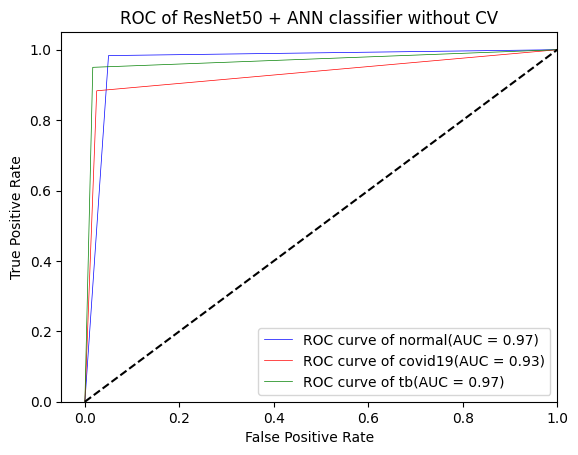

In [94]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'covid19', 2:'tb'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of ResNet50 + ANN classifier without CV')
plt.legend(loc="lower right")
plt.show()

ANN with CV

In [95]:
# 10 fold cv

kf10_ann = KFold(n_splits = 10, shuffle=True)

scores2_ann = cross_val_score(ann, x_ar, y_ar, cv = kf10_ann)

print("Cross Validation Scores: ", scores2_ann)
print("Average CV Score: ", scores2_ann.mean())
print("Number of CV Scores used in Average: ", len(scores2_ann))

Cross Validation Scores:  [0.97777778 0.93333333 0.95555556 0.96666667 0.95555556 0.96666667
 0.97777778 0.96666667 0.95555556 0.95555556]
Average CV Score:  0.961111111111111
Number of CV Scores used in Average:  10


In [96]:
# Make cross validated predictions
predictions = cross_val_predict(ann, x_ar, y_ar, cv=kf10_ann)

In [97]:
# Binarize the output
PREDcv = to_categorical(predictions, num_classes=3)

Ycv = to_categorical(y_ar, num_classes=3)

ROC ANN with CV

In [98]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Ycv[:,i], PREDcv[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\Zul\AppData\Local\Temp\ipykernel_11664\1108501141.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


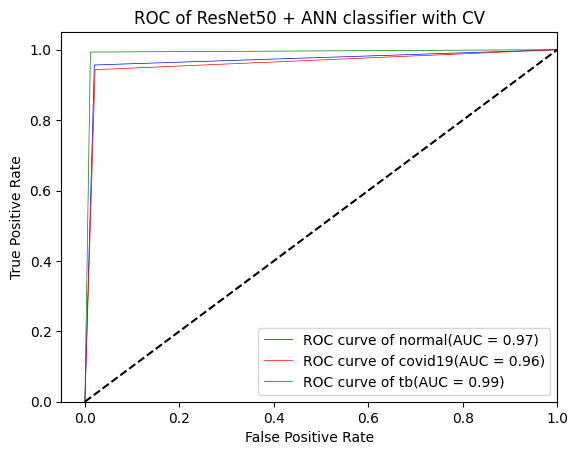

In [99]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'covid19', 2:'tb'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of ResNet50 + ANN classifier with CV')
plt.legend(loc="lower right")
plt.show()